### Predictive maintennace 
Description from [Kaggle:]('https://www.kaggle.com/datasets/hiimanshuagarwal/predictive-maintenance-dataset')
A company has a fleet of devices transmitting daily sensor readings. They would like to create a predictive maintenance solution to proactively identify when maintenance should be performed. This approach promises cost savings over routine or time based preventive maintenance, because tasks are performed only when warranted.

The task is to build a predictive model using machine learning to predict the probability of a device failure. When building this model, be sure to minimize false positives and false negatives. The column you are trying to Predict is called failure with binary value 0 for non-failure and 1 for failure.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set(color_codes=True)

In [2]:
data = pd.read_csv('predictive_maintenance_dataset.csv')
data.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
failure,124494.0,8.514467e-04,2.916725e-02,0.0,0.0,0.0,0.0,1.0
metric1,124494.0,1.223881e+08,7.045933e+07,0.0,61284762.0,122797388.0,183309640.0,244140480.0
metric2,124494.0,1.594927e+02,2.179678e+03,0.0,0.0,0.0,0.0,64968.0
metric3,124494.0,9.940897e+00,1.857481e+02,0.0,0.0,0.0,0.0,24929.0
metric4,124494.0,1.741120e+00,2.290851e+01,0.0,0.0,0.0,0.0,1666.0
metric5,124494.0,1.422267e+01,1.594303e+01,1.0,8.0,10.0,12.0,98.0
metric6,124494.0,2.601727e+05,9.915108e+04,8.0,221452.0,249799.5,310266.0,689161.0
metric7,124494.0,2.925282e-01,7.436924e+00,0.0,0.0,0.0,0.0,832.0
metric8,124494.0,2.925282e-01,7.436924e+00,0.0,0.0,0.0,0.0,832.0
metric9,124494.0,1.301385e+01,2.756612e+02,0.0,0.0,0.0,0.0,70000.0


In [5]:
data.failure.value_counts()

0    124388
1       106
Name: failure, dtype: int64

- Dataset is very unbalanced. 
- Check the duplicates 

In [17]:
print(data.device.value_counts())
print(len(data.device.value_counts()))

Z1F0QLC1    304
S1F0KYCR    304
S1F0E9EP    304
S1F0EGMT    304
S1F0FGBQ    304
           ... 
W1F1CHZK      5
W1F1CJKT      5
S1F04KSC      4
W1F0WJFT      3
W1F1DA5ÿ      1
Name: device, Length: 1169, dtype: int64
1169


There are only 1169 unique devices in whole dataset of app. 124500 entries. This could mean that:

    * some devices are repaired several times already, but for that would be interesting to see when, or what were the metrics which indicated failure? 
    * not sure if these metrics are device metrics or external conditions (sensor data) which impact the functioning of machine?
    *  Besides asking question if particular device will fail or not, more interesting question would be to estimate WHEN it will fail? 
    * When checking the describe result, failures are in first 3 quantiles non existent, only in last quantile, as max appear failures (1). Wondering if this is indication that failures are happening in last part of observed period? I noticed the date column has only entries for 2015, not sure which month in 2015 has most failures ?
    * Metric7 and metric8 seem to be indentical, maybe one needs to be removed?   

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failure  124494 non-null  int64 
 3   metric1  124494 non-null  int64 
 4   metric2  124494 non-null  int64 
 5   metric3  124494 non-null  int64 
 6   metric4  124494 non-null  int64 
 7   metric5  124494 non-null  int64 
 8   metric6  124494 non-null  int64 
 9   metric7  124494 non-null  int64 
 10  metric8  124494 non-null  int64 
 11  metric9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [4]:
data = data.drop('metric8', axis=1)

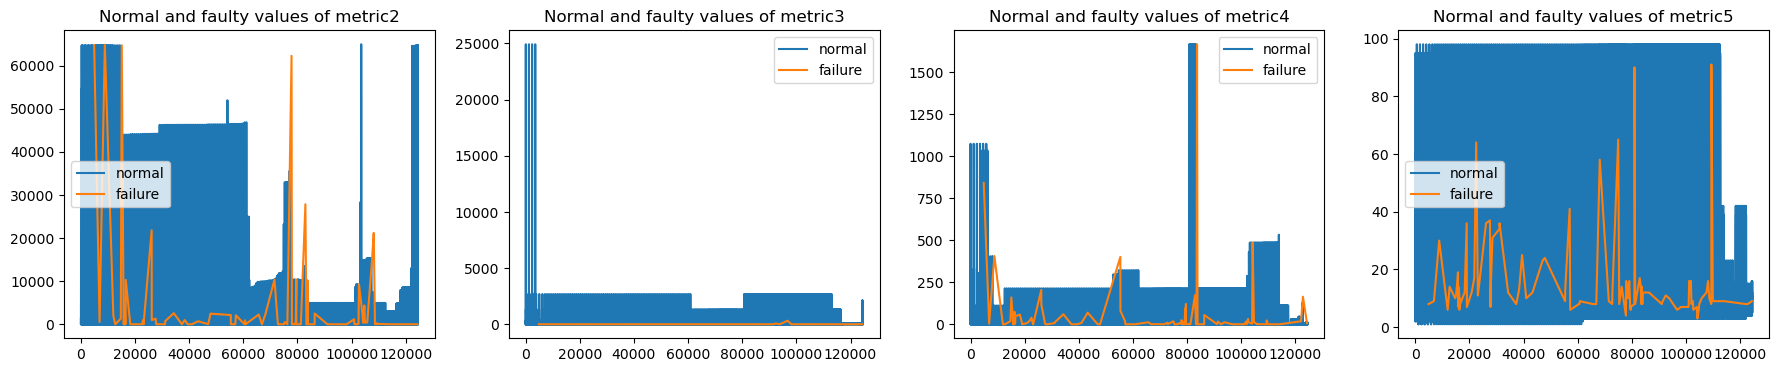

In [13]:
#divide the sheet in those without failures and those with it and check distribution of features.
normal = data[data['failure']==0]
failure = data[data['failure']==1]
#nums = data.select_dtypes(include=int)
#sns.pairplot(nums, hue='failure', diag_kind='kde')
#plt.show()

sparse = ['metric2', 'metric3', 'metric4', 'metric5']

fig, ax = plt.subplots(1,4, figsize=(22,4))

for m in range(len(sparse)):
    normal[sparse[m]].plot(label='normal', ax= ax[m])
    failure[sparse[m]].plot(label='failure', ax=ax[m])
    ax[m].set_title('Normal and faulty values of {}'.format(sparse[m]))
    ax[m].legend()
plt.show()


<ipython-input-58-9d497a5698b4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


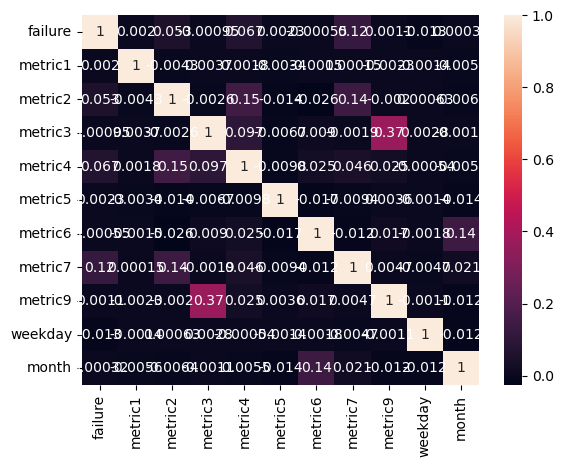

In [58]:
#are these metrics somehow correlated ? 

corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [14]:
#check metrics for devices repaired several times (if each entry is failure? when was failure when normal, why are there 304 entries for one device?)
#maybe these are actually duplicates if date and failure is the same no reason to keep it?
#change the date column to date, check the repair dates or most number of failures 
data['date'] = pd.to_datetime(data['date'])

In [21]:
data['weekday']=data['date'].dt.weekday
data['month'] = data['date'].dt.month


In [50]:
#check on one device with multiple entries the 
example = data[data['device']=='S1F0KYCR']
example.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,weekday,month,active_days
112,2015-01-01,S1F0KYCR,0,175582800,0,0,0,9,198663,0,0,3,1,0 days
1275,2015-01-02,S1F0KYCR,0,198251016,0,0,0,9,200008,0,0,4,1,1 days
2438,2015-01-03,S1F0KYCR,0,221716600,0,0,0,9,201344,0,0,5,1,2 days
3601,2015-01-04,S1F0KYCR,0,5428040,0,0,0,9,202720,0,0,6,1,3 days
4762,2015-01-05,S1F0KYCR,0,29659456,0,0,0,9,204041,0,0,0,1,4 days


In [49]:
#just in first month, we need the column active days 
first_date =data['date'].min()

data['active_days'] = data.date - first_date


In [127]:
first_date.month

1

In [52]:
example.month.value_counts()   #quite active machine 

1     31
3     31
5     31
7     31
8     31
4     30
6     30
9     30
10    30
2     28
11     1
Name: month, dtype: int64

we need to check if machine got failure and then if it is repaired, we need separate df for that only for devices which have active days >0, and we need to find a way to say if machine got failure or not. if for specific machine max date is higher than the date of failure, machine got back to production after repair. 

In [59]:
data.weekday.value_counts()

3    18141
4    18041
5    17897
0    17886
6    17859
1    17534
2    17136
Name: weekday, dtype: int64

In [56]:
example.failure.value_counts() # no failures 

0    304
Name: failure, dtype: int64

In [72]:
df_max_date = data.groupby('device')['date'].max().reset_index(name='max_utility_date')
print(df_max_date.head())
print(df_max_date.shape[0])

     device max_utility_date
0  S1F01085       2015-01-06
1  S1F013BB       2015-05-11
2  S1F0166B       2015-01-06
3  S1F01E6Y       2015-02-17
4  S1F01JE0       2015-01-06
1169


In [78]:
data = pd.merge(data, df_max_date, how='left', on='device')

In [81]:
data.tail()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,weekday,month,active_days,max_utility_date
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,0,0,11,305 days,2015-11-02
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,13,0,11,305 days,2015-11-02
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0,11,305 days,2015-11-02
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0,11,305 days,2015-11-02
124493,2015-11-02,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,70000,0,11,305 days,2015-11-02


In [107]:
#check how many times are machines fixed ?

norm = data.loc[data.failure==0, ['date', 'failure','device', 'month','max_utility_date']]
fail = data.loc[data.failure==1, ['device', 'failure','date','month', 'max_utility_date']]

fail_devices = fail.device.to_list()

In [176]:
len(fail[fail['date']< fail['max_utility_date']]) # only 5 devices are fixed and put back to production 
fixed_devices = fail[fail['date']< fail['max_utility_date']]['device']
fixed=fixed_devices.to_list()
fixed[0]

'S1F136J0'

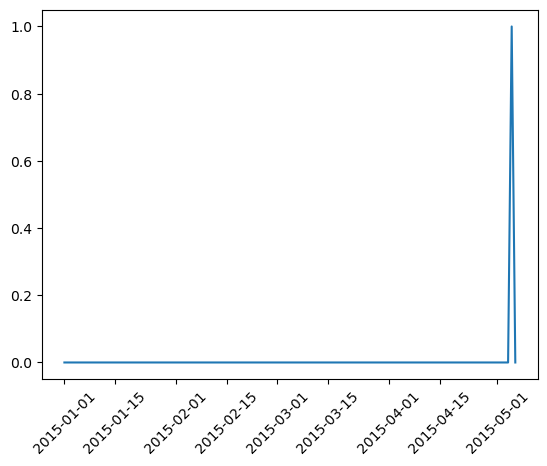

In [126]:
per_device=data.loc[data['device']=='S1F136J0', ['failure', 'date', 'max_utility_date']]
plt.plot(per_device['date'], per_device['failure'])
plt.xticks(rotation = 45)
plt.show()

In [177]:
(per_device['max_utility_date'].max().month)
for i in range(len(fixed)):
    print(fixed[i])

S1F136J0
W1F0KCP2
W1F0M35B
S1F0GPFZ
W1F11ZG9


In [194]:
def plot_device_operation(df, device_number):
    device_df = df.loc[df['device']==device_number][['failure', 'date', 'month']]
    #print(device_df)
   # fig, ax = plt.figure(figsize=(12,4))
    if device_df['month'].max()== device_df['date'].max().month:
        plt.plot(device_df['date'], device_df['failure'], label= device_number)
        plt.xticks(rotation=45)
        
    else:
        plt.plot(device_df['month'], device_df['failure'], label=device_number)
    plt.legend()
    plt.show()
    
     

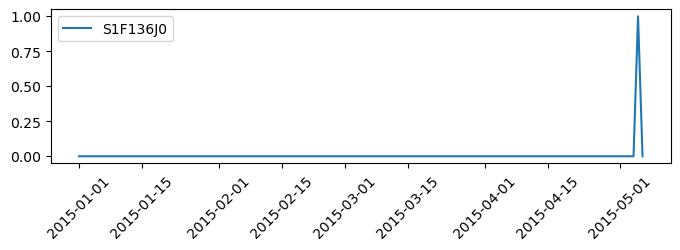

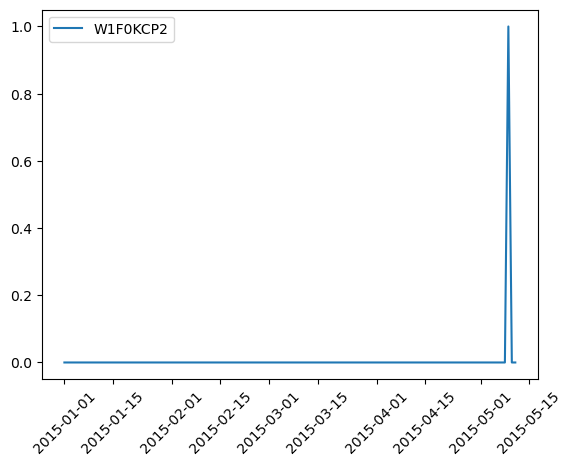

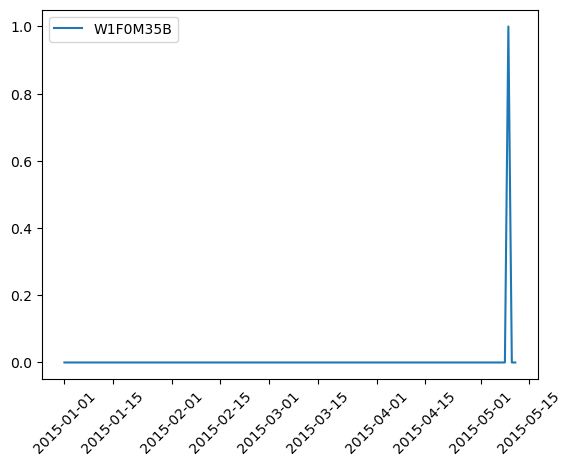

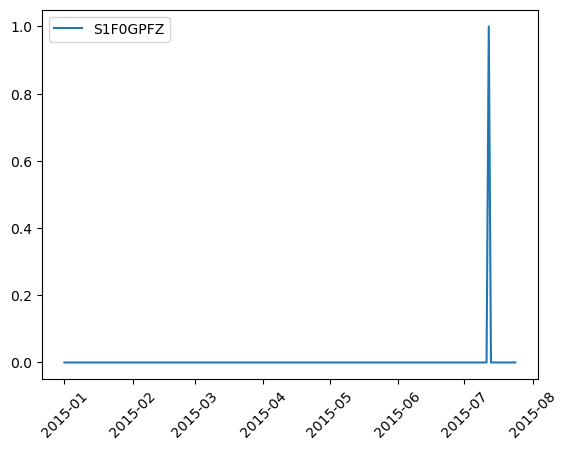

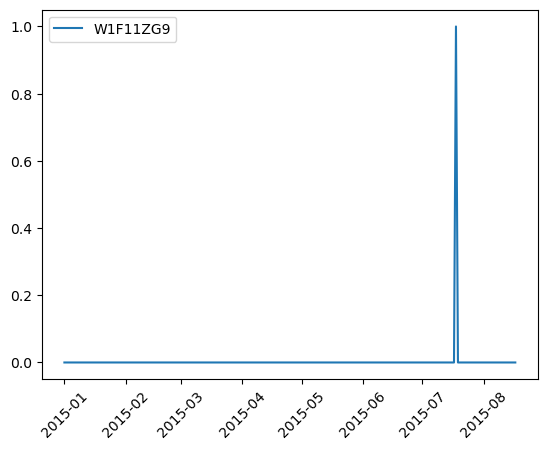

In [195]:
fig = plt.figure(figsize=(8,2))
for i in range(len(fixed)):
    plot_device_operation(data, fixed[i])

In [105]:
joined = pd.merge(norm, fail, how='inner', on='device')

In [106]:
joined.head()

,date_x,failure_x,device,month_x,max_utility_date_x,failure_y,date_y,month_y,max_utility_date_y
0,2015-01-01,0,S1F023H2,1,2015-01-19,1,2015-01-19,1,2015-01-19
1,2015-01-02,0,S1F023H2,1,2015-01-19,1,2015-01-19,1,2015-01-19
2,2015-01-03,0,S1F023H2,1,2015-01-19,1,2015-01-19,1,2015-01-19
3,2015-01-04,0,S1F023H2,1,2015-01-19,1,2015-01-19,1,2015-01-19
4,2015-01-05,0,S1F023H2,1,2015-01-19,1,2015-01-19,1,2015-01-19


In [86]:
fail.groupby('device').value_counts().sum() # so each device which had defect was fixed only once 

106

In [80]:
data.drop('max_date', inplace=True, axis=1)

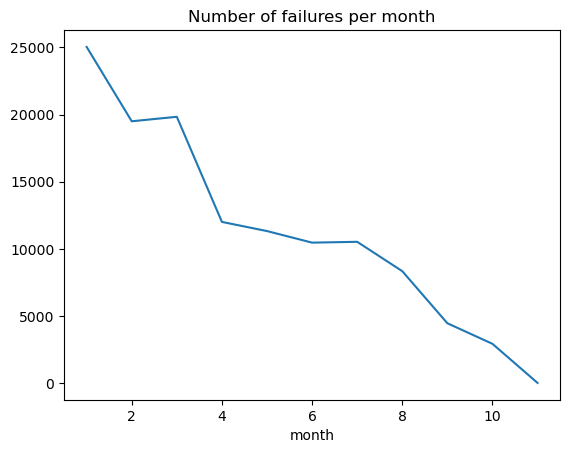

In [42]:
per_month = data.groupby('month')['failure'].count()
per_month.plot()   
plt.title('Number of failures per month') 
plt.show()

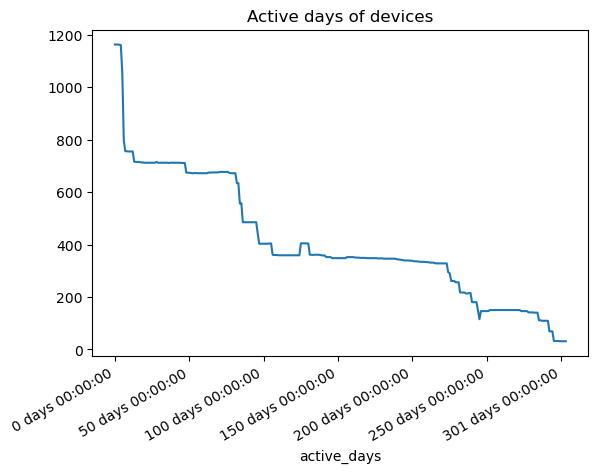

In [82]:
days_group = data.groupby('active_days')['device'].count()
days_group.plot()
plt.title('Active days of devices')
plt.show()
#highest number of active days is 0 because all devices started from day 0

## WORK in PROGRESS